# Polynomial Regression vs Linear Regression

## Import libraries and dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import Cleaner as cl

dataset_year_new = cl.get_and_clean_df('../../data/bilhandel_unclean.csv').sort_values(by=['Årgang'])
dataset_year_new = dataset_year_new[dataset_year_new['Make'] == "Mazda"]
X_year = dataset_year_new.iloc[:, 5:6] # Årgang
y_year = dataset_year_new.iloc[:, -1] # Pris

dataset_km_new = cl.get_and_clean_df('../../data/bilhandel_unclean.csv').sort_values(by=['Kilometer'])
dataset_km_new = dataset_km_new[dataset_km_new['Make'] == "Mazda"]
X_km = dataset_km_new.iloc[:, 4:5] # Kilometer
y_km = dataset_km_new.iloc[:, -1] # Pris

## Splitting up the dataset for training

In [2]:
from sklearn.model_selection import train_test_split

X_year_train, X_year_test, y_year_train, y_year_test = train_test_split(X_year, y_year, test_size = 0.2, random_state = 0)
X_km_train, X_km_test, y_km_train, y_km_test = train_test_split(X_km, y_km, test_size = 0.2, random_state = 0)

## Training the Linear Regression model

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg_year = LinearRegression()
lin_reg_km = LinearRegression()
lin_reg_year.fit(X_year_train, y_year_train)
lin_reg_km.fit(X_km_train, y_km_train)

LinearRegression()

## Training the Polynomial Regression model

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly_year_reg = PolynomialFeatures(degree= 3)
poly_km_reg = PolynomialFeatures(degree= 3)

X_year_poly = poly_year_reg.fit_transform(X_year_train)
X_km_poly = poly_km_reg.fit_transform(X_km_train)

lin_reg_year_2 = LinearRegression()
lin_reg_year_2.fit(X_year_poly, y_year_train)

lin_reg_km_2 = LinearRegression()
lin_reg_km_2.fit(X_km_poly, y_km_train)

LinearRegression()

## Visualising Year VS Price

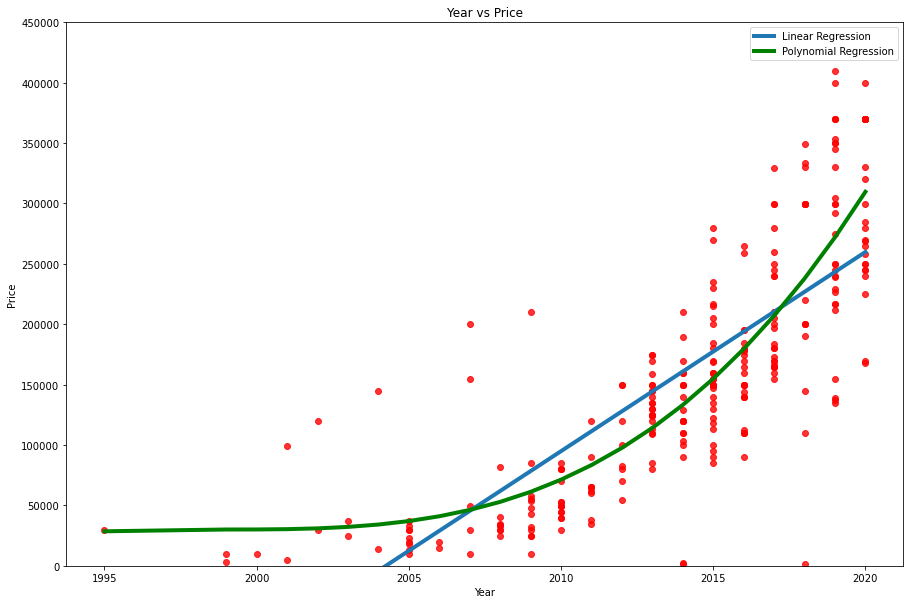

In [5]:
plt.figure(figsize=(15,10))
plt.scatter(X_year, y_year, color = 'red', alpha=0.8)
plt.plot(X_year, lin_reg_year.predict(X_year), label="Linear Regression", linewidth=4)
plt.plot(X_year, lin_reg_year_2.predict(poly_year_reg.fit_transform(X_year)), label="Polynomial Regression", color="green", linewidth=4)
plt.ylim(0,450000)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()


## Visualising Kilometer VS Price

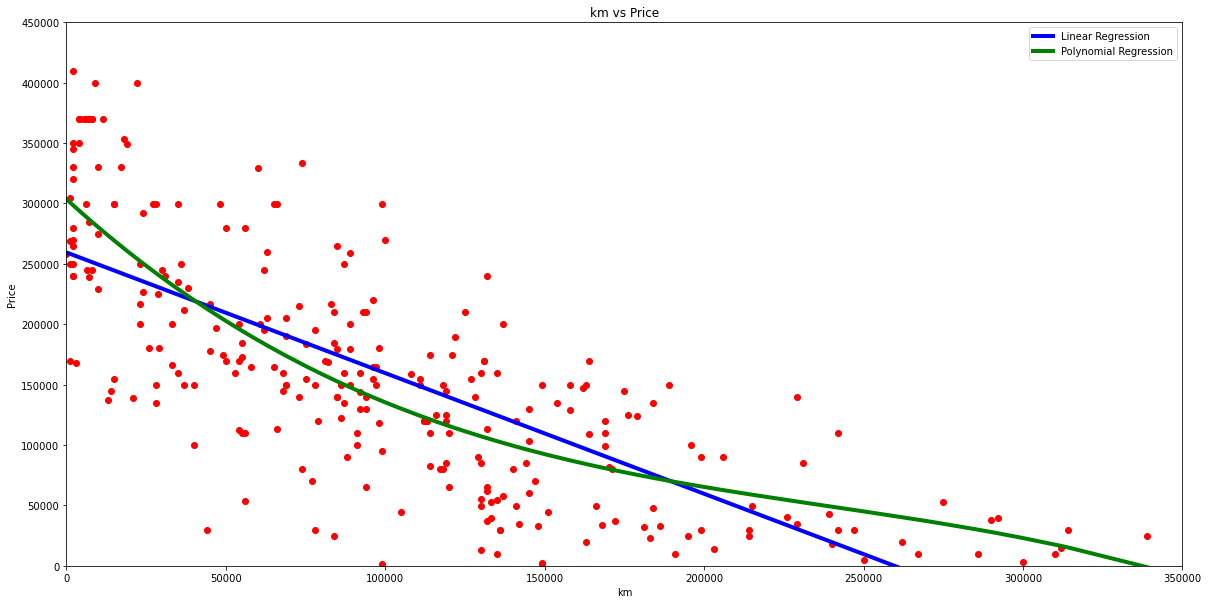

In [6]:
plt.figure(figsize=(20,10))
plt.scatter(X_km, y_km, color = 'red')
plt.plot(X_km, lin_reg_km.predict(X_km), label="Linear Regression", linewidth=4, color="blue")
plt.plot(X_km, lin_reg_km_2.predict(poly_km_reg.fit_transform(X_km)), label="Polynomial Regression", linewidth=4, color="green")
plt.legend()
plt.ylim(0,450000)
plt.xlim(0,350000)
plt.title('km vs Price')
plt.xlabel('km')
plt.ylabel('Price')
plt.show()

## Predicting test result with Linear Regression

In [7]:
predict_year = lin_reg_year.predict(X_year_test)
predict_km = lin_reg_km.predict(X_km_test)
y_year_test = y_year_test.to_numpy()
y_km_test = y_km_test.to_numpy()

np.set_printoptions(precision=2)

display(lin_reg_year.score(X_year_test, y_year_test))
display(np.concatenate((predict_year.reshape(len(predict_year), 1),y_year_test.reshape(len(y_year_test), 1) ), 1))

display(lin_reg_km.score(X_km_test, y_km_test))
display(np.concatenate((predict_km.reshape(len(predict_km), 1),y_km_test.reshape(len(y_km_test), 1) ), 1))

0.6390894310551414

array([[226808.77, 199900.  ],
       [243297.17, 244900.  ],
       [259785.58, 244900.  ],
       [ 12459.49,  30000.  ],
       [ 94901.52,  69800.  ],
       [243297.17, 238700.  ],
       [259785.58, 369800.  ],
       [193831.95, 149900.  ],
       [226808.77, 329900.  ],
       [144366.74, 129900.  ],
       [210320.36, 159700.  ],
       [ 94901.52,  79900.  ],
       [193831.95, 149900.  ],
       [177343.55,  99900.  ],
       [144366.74, 144700.  ],
       [160855.14, 149995.  ],
       [ 28947.9 ,  19900.  ],
       [243297.17, 274900.  ],
       [111389.93,  61999.  ],
       [193831.95, 179500.  ],
       [177343.55, 129900.  ],
       [-20517.32,  24900.  ],
       [-53494.13,   4900.  ],
       [144366.74, 112900.  ],
       [144366.74, 125000.  ],
       [127878.33,  82900.  ],
       [210320.36, 209980.  ],
       [ 12459.49,  17900.  ],
       [193831.95, 149900.  ],
       [160855.14, 189800.  ],
       [193831.95, 139900.  ],
       [111389.93,  37900.  ],
       [

0.536800250455991

array([[110554.17,   1648.  ],
       [ 96568.1 ,  19800.  ],
       [ 60603.9 ,  89900.  ],
       [257407.98, 264800.  ],
       [232432.84, 299700.  ],
       [ 87577.05,  36900.  ],
       [ 20643.68,  42800.  ],
       [140524.34, 119900.  ],
       [119545.22,  79900.  ],
       [203461.68, 109900.  ],
       [129535.28,  84900.  ],
       [230769.5 , 224990.  ],
       [161503.45, 179900.  ],
       [170494.5 , 199990.  ],
       [196468.64, 204900.  ],
       [190474.61, 189900.  ],
       [253504.86, 369800.  ],
       [ 75588.98,  48000.  ],
       [226438.81, 166500.  ],
       [159505.44, 269900.  ],
       [170494.5 , 259000.  ],
       [257407.98, 279400.  ],
       [257407.98, 269900.  ],
       [209455.71, 279900.  ],
       [193471.63, 112900.  ],
       [219445.77,  99900.  ],
       [127537.27,  64900.  ],
       [257407.98, 249900.  ],
       [145519.36,  82900.  ],
       [176488.53, 217000.  ],
       [146518.37, 119900.  ],
       [226438.81, 199900.  ],
       [

## Predicting a new result with Polynomial Regression

In [8]:
predict_year = lin_reg_year_2.predict(poly_year_reg.fit_transform(X_year_test))
predict_km = lin_reg_km_2.predict(poly_km_reg.fit_transform(X_km_test))

np.set_printoptions(precision=2)

display(lin_reg_year_2.score(poly_year_reg.fit_transform(X_year_test), y_year_test))
display(np.concatenate((predict_year.reshape(len(predict_year), 1),y_year_test.reshape(len(y_year_test), 1) ), 1))

display(lin_reg_km_2.score(poly_km_reg.fit_transform(X_km_test), y_km_test))
display(np.concatenate((predict_km.reshape(len(predict_km), 1),y_km_test.reshape(len(y_km_test), 1) ), 1))

0.7281855936619581

array([[237759.28, 199900.  ],
       [271903.99, 244900.  ],
       [309597.53, 244900.  ],
       [ 37030.01,  30000.  ],
       [ 71315.6 ,  69800.  ],
       [271903.99, 238700.  ],
       [309597.53, 369800.  ],
       [179414.89, 149900.  ],
       [237759.28, 329900.  ],
       [114130.4 , 129900.  ],
       [206988.03, 159700.  ],
       [ 71315.6 ,  79900.  ],
       [179414.89, 149900.  ],
       [154864.48,  99900.  ],
       [114130.4 , 144700.  ],
       [133161.44, 149995.  ],
       [ 40998.27,  19900.  ],
       [271903.99, 274900.  ],
       [ 83382.84,  61999.  ],
       [179414.89, 179500.  ],
       [154864.48, 129900.  ],
       [ 32199.23,  24900.  ],
       [ 30340.29,   4900.  ],
       [114130.4 , 112900.  ],
       [114130.4 , 125000.  ],
       [ 97595.99,  82900.  ],
       [206988.03, 209980.  ],
       [ 37030.01,  17900.  ],
       [179414.89, 149900.  ],
       [133161.44, 189800.  ],
       [179414.89, 139900.  ],
       [ 83382.84,  37900.  ],
       [

0.6002868580138063

array([[ 93080.01,   1648.  ],
       [ 84189.19,  19800.  ],
       [ 65703.68,  89900.  ],
       [298664.77, 264800.  ],
       [244372.67, 299700.  ],
       [ 79042.53,  36900.  ],
       [ 49346.63,  42800.  ],
       [116579.84, 119900.  ],
       [ 99442.08,  79900.  ],
       [193026.24, 109900.  ],
       [107178.06,  84900.  ],
       [241100.84, 224990.  ],
       [137455.29, 179900.  ],
       [147707.61, 199990.  ],
       [182323.86, 204900.  ],
       [173635.54, 189900.  ],
       [289519.43, 369800.  ],
       [ 72769.39,  48000.  ],
       [232774.37, 166500.  ],
       [135288.29, 269900.  ],
       [147707.61, 259000.  ],
       [298664.77, 279400.  ],
       [298664.77, 269900.  ],
       [202702.26, 279900.  ],
       [177924.78, 112900.  ],
       [219902.97,  99900.  ],
       [105571.5 ,  64900.  ],
       [298664.77, 249900.  ],
       [121186.77,  82900.  ],
       [155015.73, 217000.  ],
       [122134.36, 119900.  ],
       [232774.37, 199900.  ],
       [